# Valoración de Opciones
Consideremos la Ecuación Diferencial Estocástica dada por:
$$dS_t = \alpha (\mu-S_t)dt +\sigma dB_t$$
### Neutralización de la E.D.E:
$$S_t^*= e^{-rt}S_t$$
Aplicando la fórmula de ito al pago descontado:
$$dS_t^* = -re^{-rt}S_tdt+ e^{-rt}dS_t$$
$$dS_t^* = -re^{-rt}S_tdt+e^{-rt}(\alpha (\mu-S_t)dt +\sigma dB_t) $$
$$dS_t^* = (-( \alpha+ r)S_t^*+\alpha\mu e^{-rt})dt+ \sigma e^{-rt}dB_t$$
Haciéndolo una Martingala:
$$\phi(t)= \frac{(-( \alpha+ r)S_t^*+\alpha\mu e^{-rt})}{\sigma e^{-rt}} = \frac{-(r+\alpha)S_t+\alpha \mu}{\sigma}$$
$$B_t^*=B_t + \int_0^t \phi(s)ds \rightarrow dB_t^*=dB_t + \phi(t) \rightarrow dB_t = dB_t^* - \phi(t)$$
Entonces:
$$dS_t = \alpha (\mu-S_t)dt +\sigma(dB_t^* - \phi(t)) = \alpha (\mu-S_t)dt +\sigma\left(dB_t^* - \frac{-(r+\alpha)S_t+\alpha \mu}{\sigma}\right)$$
$$dS_t = rS_t dt + \sigma dB_t^*$$

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [2]:
# PARÁMETROS
s0 = 10
T = 1
N = 100 
r = 0.05
sigma = 0.3
K = 1.1*s0 # Precio de ejercicio: Un 10% más del precio inicial
M = 100
k = 50 # Número de trayectorias en cada simulación
dt = T/N

## Simulación montecarlo


Media:
0.006942191872225919
Mínimo:
0.0
Máximo:
0.03213533690512719


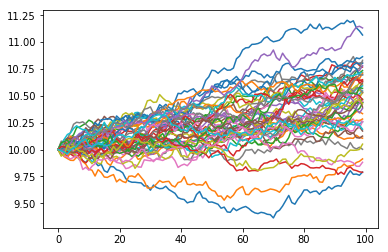

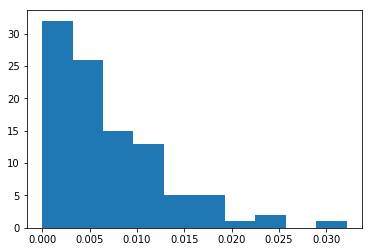

In [3]:
S = np.zeros([k,N]) # Filas cada tracyectoria, columnas el tiempo
payoff=np.zeros(k) #en cada simulacion saco el payoff de cada trayectoria
opcion=np.zeros(M) #Tantas opciones como simulaciones
for h in range(M):
    for i in range(k):
        S[i,0] = s0
    for i in range(k):
        for t in range(N-1):
            S[i,t+1]=S[i,t]+r*S[i,t]*dt+sigma*np.sqrt(dt)*np.random.normal()
        payoff[i]=np.max([S[i,N-1]-K,0]) 
    opcion[h]=np.exp(-r*T)*np.mean(payoff); 
opcionmedio = np.mean(opcion)
opcionmax = np.max(opcion)
opcionmin = np.min(opcion)
print('Media:')
print(opcionmedio)
print('Mínimo:')
print(opcionmin)
print('Máximo:')
print(opcionmax)
plt.plot(np.matrix(S).T)
plt.show()
plt.hist(opcion)
plt.show()

## Árbol Binomial
Probabilidad de subir: $P_j^{(i)}=\frac{1}{2}+\frac{\left[r-\frac{1}{2}\left(\frac{\sigma}{S_j^{(i)}}\right)^2\right]\sqrt{\Delta t}}{2\frac{\sigma}{S_j^{(i)}}}$

Proporción de subida: $u_j^{(i)}= e^{\frac{\sigma}{S_j^{(i)}}\sqrt{\Delta t}}$

Proporción de bajada: $d_j^{(i)} = \frac{1}{u_j^{(i)}}$

In [4]:
arbol = np.zeros((N+1,N+1))
arbol[0,0] = s0
for i in range(N):
    for j in range(i+1):
        u = np.exp(sigma*np.sqrt(dt)/arbol[i,j])
        d = 1/u
        arbol[i+1,j]   = arbol[i,j]*d
        arbol[i+1,j+1] = arbol[i,j]*u
f = np.zeros((N+1,N+1))
for j in range(N+1):
    f[N,j] = np.maximum(arbol[N,j] - K,0)
for i in range(N-1,-1,-1):
    for j in range(i+1):
        p = 1/2 + (r-1/2*(sigma/arbol[i,j])**2)*np.sqrt(dt)/(2*sigma/arbol[i,j])
        f[i,j] = np.exp(-r*dt)*(p*f[i+1,j+1] + (1-p)*f[i+1,j])
f[0,0]

0.006252581206422722

## Diferencias finitas

In [5]:
Smax = 2*s0
dS = 0.01
M = int(np.ceil(Smax/dS))
dt = dS**2/sigma**2
N = int( np.ceil(T/dt))
dt = T/N
f = np.zeros((N+1,M+1))
f[:,0] = 0
f[:,M] = Smax - K
for j in range(M):
    f[N,j] = np.max([j*dS-K,0])
a = np.zeros(M+1)
b = np.zeros(M+1)
c = np.zeros(M+1)
for j in range(M+1):
    a[j] = (dt/(1+r*dt)) * ((sigma**2)/(2*dS**2) - (r * j/2))
    b[j] = (dt/(1+r*dt)) * ((1/dt) - sigma**2/dS**2)
    c[j] = (dt/(1+r*dt)) * ((sigma**2)/(2*dS**2) + (r * j/2))
    
for i in reversed(range(N)):
    for j in reversed(range(1, M)):
        f[i,j] = a[j] * f[i+1, j-1] + b[j] * f[i+1, j] + c[j] * f[i+1, j+1]
S = np.arange(0, Smax+dS, dS)
t = np.arange(0, T+dt, dt)
indice = np.where(S == s0)[0][0]
print(f[0,indice])

0.006956518047750848


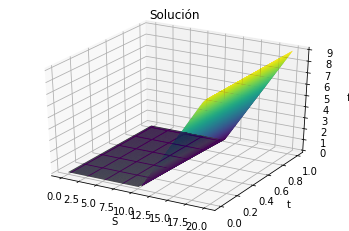

In [6]:
X = S[:-1]
Y = t
X, Y = np.meshgrid(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, f, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Solución');
ax.set_xlabel('S')
ax.set_ylabel('t')
ax.set_zlabel('f');